<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/CNN_clasG%5ED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import tensorflow as tf
from tensorflow.keras import backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import zipfile
import io

from google.colab import files

In [85]:
'''uploaded = files.upload()'''

'uploaded = files.upload()'

In [86]:
data = zipfile.ZipFile('/content/validacion.zip', 'r')
data.extractall()

In [87]:
K.clear_session()

In [88]:
train = r'/content/validacion'

In [89]:
img_dtagen = tf.keras.preprocessing.image.ImageDataGenerator(
                rescale = 1./255,
                zoom_range=0.3,
                shear_range=0.3,
                horizontal_flip=True
)

In [90]:
image_train = img_dtagen.flow_from_directory(
    train,
    target_size=(150,150),
    batch_size=8,
    class_mode='categorical'
)

Found 2023 images belonging to 2 classes.


In [91]:
image_train.class_indices

{'gato': 0, 'perro': 1}

In [92]:
image_train.batch_size

8

In [93]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (2,2), padding='valid', input_shape=(150,150,3), activation='relu', strides=(2,2)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', strides=(2,2)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Conv2D(64, (2,2), padding='same', strides=(1,1)),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), padding='valid', strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [94]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              metrics=['accuracy'])

In [95]:
step_train = image_train.n // image_train.batch_size

step_train

252

In [96]:
history = model.fit_generator(image_train, steps_per_epoch=step_train, epochs=30)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
252/252 [==============================] - 14s 54ms/step - loss: 0.7106 - accuracy: 0.5276
Epoch 2/30
252/252 [==============================] - 14s 55ms/step - loss: 0.6587 - accuracy: 0.6204
Epoch 3/30
252/252 [==============================] - 14s 55ms/step - loss: 0.6522 - accuracy: 0.6237
Epoch 4/30
252/252 [==============================] - 14s 54ms/step - loss: 0.6339 - accuracy: 0.6426
Epoch 5/30
252/252 [==============================] - 14s 54ms/step - loss: 0.5866 - accuracy: 0.6852
Epoch 6/30
252/252 [==============================] - 14s 54ms/step - loss: 0.5560 - accuracy: 0.7290
Epoch 7/30
252/252 [==============================] - 14s 54ms/step - loss: 0.5267 - accuracy: 0.7406
Epoch 8/30
252/252 [==============================] - 14s 55ms/step - loss: 0.5044 - accuracy: 0.7644
Epoch 9/30
252/252 [==============================] - 14s 55ms/step - loss: 0.4745 - accuracy: 0.7729
Epoch 10/30
252/252 [==============================] - 14s 55ms/step - loss: 0.461

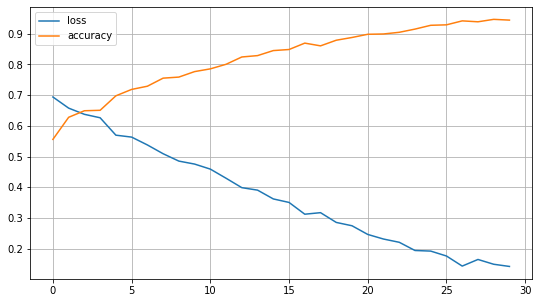

In [97]:
pd.DataFrame(history.history).plot(figsize=(9,5))
plt.grid()

In [98]:
def predict(file):
    
    x = tf.keras.preprocessing.image.load_img(file, target_size=(150,150))
    x = tf.keras.preprocessing.image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    vec = model.predict(x)
    
    return np.argmax(vec[0])

In [99]:
image_train.class_indices

{'gato': 0, 'perro': 1}

In [124]:
data = zipfile.ZipFile('/content/entrenamiento.zip', 'r')
data.extractall()

In [126]:
test_dtagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
)

In [134]:
test_gato = r'/content/test_gato'
test_perro = r'/content/test_perro'

prub = '/content/prub'

In [135]:
image_test = test_dtagen.flow_from_directory(
    directory=prub,
    target_size=(150, 150),
    color_mode='rgb',
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=4
)

Found 524 images belonging to 2 classes.


In [136]:
image_test.reset()

In [137]:
pred = model.predict_generator(image_test, steps=524, verbose=1)

 30/524 [>.............................] - ETA: 1s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


524/524 [==============================] - 2s 4ms/step


In [138]:
arg_pred = np.argmax(pred, axis=1)

In [139]:
arg_pred.sum()

62